### Part 3 – Individual Athlete Visualization  
**Contributor:** Jonathan Jafari  
**Athlete:** PLAYER_680  
**Metric:** Jump Height (m)  
**Figure file:** `screenshots/part3_player680_line_plot.png`

In [23]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE")

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

df = pd.read_sql(text(f"SELECT * FROM {DB_TABLE} LIMIT 50000"), engine)
df.head()


,id,playername,timestamp,device,metric,value,team,session_type,session_description,function_description,data_source,created_at
0,1,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Braking Force(N),1546.3816,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
1,2,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Braking Power(W),-1099.2175,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
2,3,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Braking Velocity(m/s),-0.7630,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
3,4,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Landing Force(N),1251.3600,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
4,5,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Propulsive Force(N),1887.0421,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54


In [24]:
# List most common metrics to help select one
metric_counts = df["metric"].value_counts().head(20)
metric_counts


metric
System Weight(N)                     687
Avg. Landing Force(N)                678
Relative Peak Landing Force(%)       677
Peak Landing Force(N)                677
L|R Avg. Landing Force(%)            676
L|R Peak Landing Force(%)            676
Landing Stiffness(N/m)               675
Avg. Propulsive Force(N)             671
Avg. Propulsive Power(W)             671
Avg. Propulsive Velocity(m/s)        671
Avg. Relative Propulsive Force(%)    671
Positive Net Impulse(N.s)            671
Jump Height(m)                       671
Takeoff Velocity(m/s)                670
Propulsive Phase(s)                  670
Peak Velocity(m/s)                   670
Peak Propulsive Power(W)             670
Peak Propulsive Force(N)             670
Propulsive Net Impulse(N.s)          670
L|R Propulsive Impulse Index(%)      669
Name: count, dtype: int64

In [25]:
# Replace with the chosen metric name from metric_counts output
metric_of_interest = "Jump Height(m)"

players_with_metric = (
    df[df["metric"] == metric_of_interest]["playername"]
    .value_counts()
    .head(20)
)

players_with_metric


playername
PLAYER_680     22
PLAYER_965     21
PLAYER_893     20
PLAYER_032     19
PLAYER_1208    18
PLAYER_1167    17
PLAYER_664     16
PLAYER_892     16
PLAYER_1204    15
PLAYER_430     14
PLAYER_752     13
PLAYER_643     13
PLAYER_528     12
PLAYER_070     11
PLAYER_753     10
PLAYER_624      9
PLAYER_708      7
PLAYER_185      6
PLAYER_826      6
PLAYER_594      6
Name: count, dtype: int64

In [26]:
player_of_interest = "PLAYER_680"
metric_of_interest = "Jump Height(m)"

subset = df[
    (df["playername"] == player_of_interest) &
    (df["metric"] == metric_of_interest)
].copy()

subset = subset.sort_values("timestamp")

subset.head()


,id,playername,timestamp,device,metric,value,team,session_type,session_description,function_description,data_source,created_at
1565,1566,PLAYER_680,2019-01-08 16:39:16,hawkins,Jump Height(m),0.2192,"Group: Athletic Performance Staff, Team: Stony...",None,None,None,hawkins,2025-10-21 16:46:54
1613,1614,PLAYER_680,2019-01-08 16:40:30,hawkins,Jump Height(m),0.1677,"Group: Athletic Performance Staff, Team: Stony...",None,None,None,hawkins,2025-10-21 16:46:54
1685,1686,PLAYER_680,2019-01-08 16:52:42,hawkins,Jump Height(m),0.2362,"Group: Athletic Performance Staff, Team: Stony...",None,None,None,hawkins,2025-10-21 16:46:54
1733,1734,PLAYER_680,2019-01-16 16:13:12,hawkins,Jump Height(m),0.2435,"Group: Athletic Performance Staff, Team: Stony...",None,None,None,hawkins,2025-10-21 16:46:54
1772,1773,PLAYER_680,2019-01-16 16:14:16,hawkins,Jump Height(m),0.2232,"Group: Athletic Performance Staff, Team: Stony...",None,None,None,hawkins,2025-10-21 16:46:54


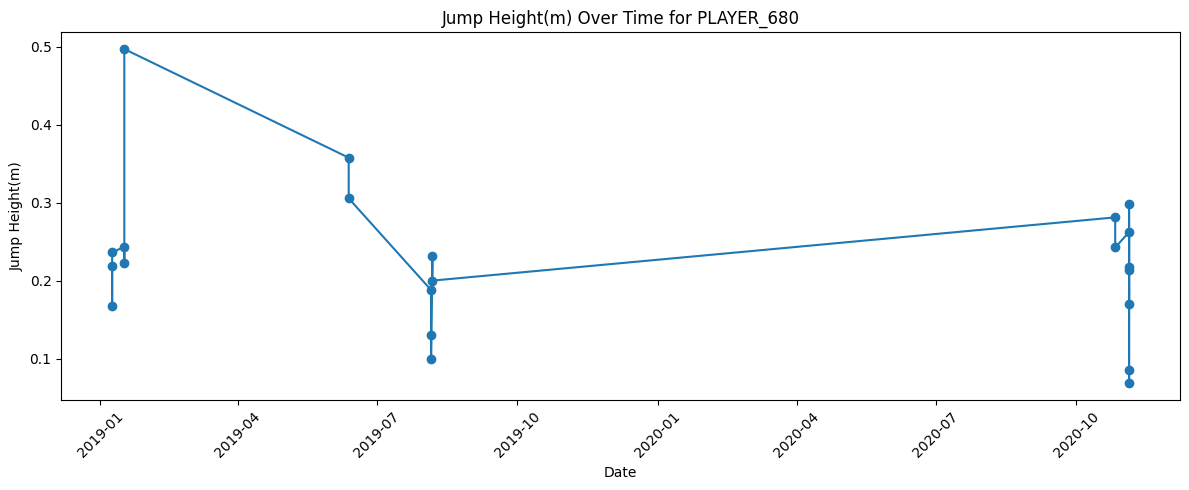

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(subset["timestamp"], subset["value"], marker='o')
plt.xlabel("Date")
plt.ylabel(metric_of_interest)
plt.title(f"{metric_of_interest} Over Time for {player_of_interest}")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("screenshots/part3_player680_line_plot.png", dpi=300)
plt.show()

